## Project - Implement Data Science Process Lifecycle on Red Wine Quality Dataset

<img src="wine.gif">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. This project aims to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

I have applied Statical Method for this project because this project has contineues data so that will be easyv ti understand relationship and also can find patterns easyly
Here we will use linear regration and the random forest regression model because linear regration model is light weight model to solve many statitical problem. Whereas, Random Forest is best model to play with this type of data.

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

Number type of data is requred which is at least 65% correlated to dependent varieable. 

### Data Collection

**Q3. From where do we get our data?**

We get our data from Miss. Kattie Tiwari

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

Red wine samples obtained from Paulo Cortez, University of Minho, Guimarães, Portugal

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

Knowing the relationship between chemical properties and wine quality can benefit businesses in many ways. By understanding the impact of different variables, businesses can improve quality control, develop better products, increase customer satisfaction, market their products more effectively, and save time and money through automated quality assessments. This information can drive success in the competitive red wine industry.

<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check for missing values and handle if any</li>
<li>Check for outliers if any and handle them</li>
<li>Implement Correlation heatmap</li>
<li>Check the distribution of data using histograms</li>
<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

In [136]:
#1. Check for missing Values and handle

import pandas as pd

Redwine=pd.read_csv("winequality-red.csv")
Redwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [137]:
#2. Check for outliers if any and handle them

import matplotlib.pyplot as plt
Redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [138]:
#3. Removing Outlier using Std 
import numpy as np

Redwinewithoutoutlier = Redwine 
columns=Redwinewithoutoutlier.columns

print("Shape Of Data Before Removing",Redwinewithoutoutlier.shape)

for h in columns:
#     print(Redwinewithoutoutlier[h].mean())
    U_Limit=Redwinewithoutoutlier[h].mean()+3*Redwinewithoutoutlier[h].std()
    L_Limit=Redwinewithoutoutlier[h].mean()-3*Redwinewithoutoutlier[h].std()
    Redwinewithoutoutlier = Redwinewithoutoutlier[(Redwinewithoutoutlier[h]<U_Limit) & (Redwinewithoutoutlier[h]>L_Limit)]
print("Shape Of Data After Removing ",Redwinewithoutoutlier.shape)

Shape Of Data Before Removing (1599, 12)
Shape Of Data After Removing  (1424, 12)


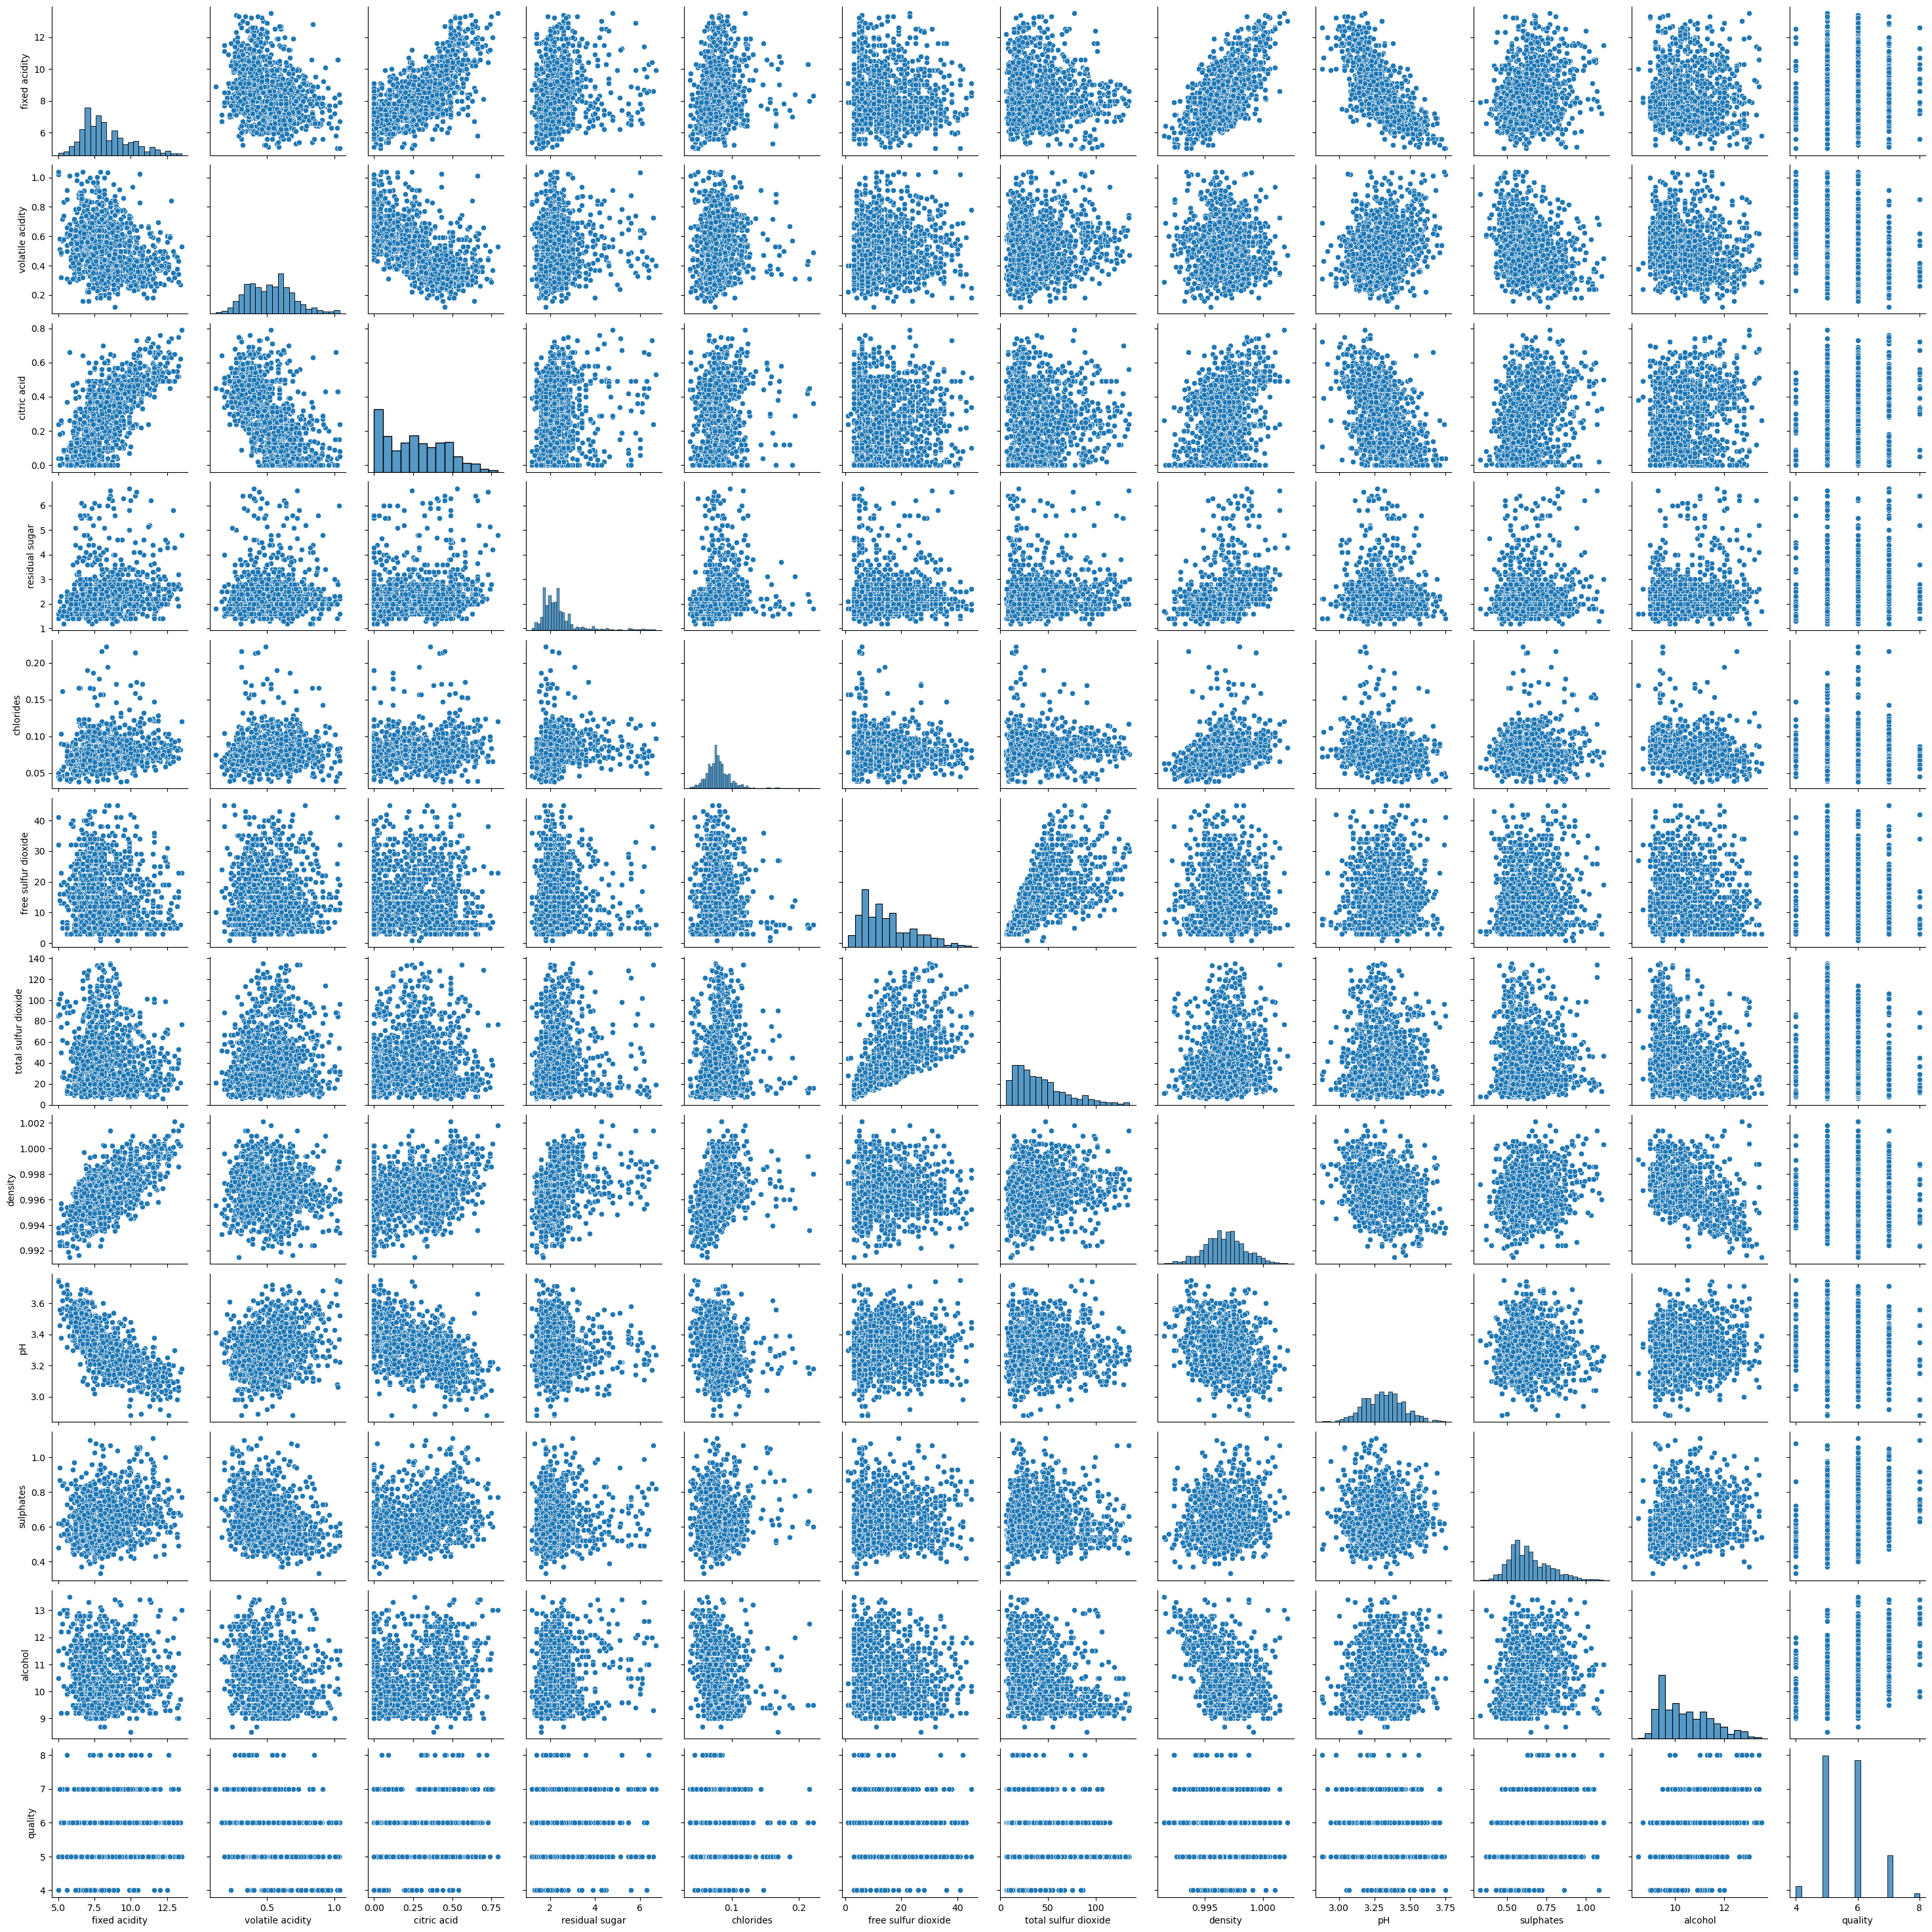

In [139]:
#4. Implement Correlation heatmap
import seaborn as sns
sns.pairplot(Redwinewithoutoutlier, height=2.5)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: Future

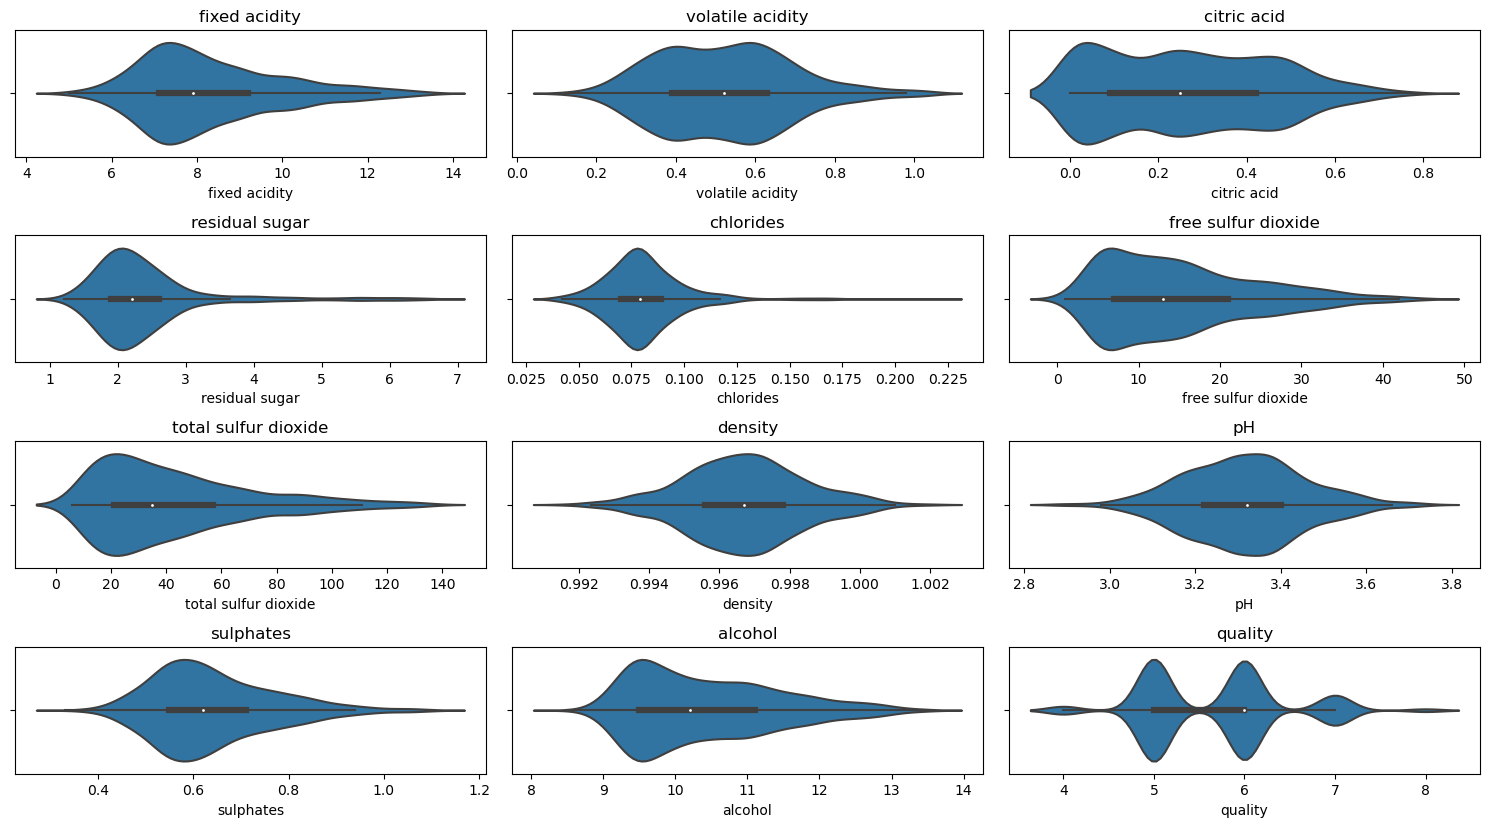

In [140]:
# 5. Check the distribution of data using histograms

plt.figure(figsize=(15, 10))
for i, col in enumerate(Redwinewithoutoutlier.columns):
    plt.subplot(len(Redwinewithoutoutlier.columns)//3 + 1, 3, i+1)
    plt.title(col)
    sns.violinplot(Redwinewithoutoutlier[col])

plt.tight_layout()
plt.show()

#Violin plots show both the distribution shape and density of the data, as well as the median, quartiles, and outliers.



In [141]:
#. 6. We will prepare data for modeling

from sklearn.model_selection import train_test_split

Features = Redwinewithoutoutlier.drop("quality",axis=1)
Labels = Redwinewithoutoutlier["quality"]

X_train, X_test, y_train,y_test = train_test_split(Features,Labels,test_size=0.2,random_state=42)

### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>

In [142]:
#Apply Linear regrassion

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Pipeline = Pipeline([('std_scalar', StandardScaler())])
X_train=Pipeline.fit_transform(X_train)
X_test =Pipeline.transform(X_test)

Linear_Reg = LinearRegression()
Linear_Reg.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


Regression model evaluation metrics

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "formulae.png">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

*TODO*
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

In [143]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2s
from sklearn.model_selection import cross_val_score
import numpy as np

def validation(model):
    Crossvalidationscore= cross_val_score(model,Features,Labels)
    return Crossvalidationscore.mean()



def Evaluate_Model(test,pred):
    MAE=round(mae(test,pred),3)
    MSE=round(mse(test,pred),3)
    Rootmse=round(np.sqrt(MSE),3)
    R2Score=round(r2s(test,pred),3)
    print('MAE:', MAE)
    print('RMSE:', Rootmse)
    print('R2 Square', R2Score)
    print('=================================')
    return MAE,Rootmse,R2Score



def Evaluate_Valuae(test,pred):
    MAE=round(mae(test,pred),3)
    MSE=round(mse(test,pred),3)
    Rootmse=round(np.sqrt(MSE),3)
    R2Score=round(r2s(test,pred),3)
    return MAE,Rootmse,R2Score

### Conclusion

*TODO*

In [144]:
pred = Linear_Reg.predict(X_test)
Train_Predict = Linear_Reg.predict(X_train)
print("Test set \n")

Evaluate_Model(y_test,pred)
print("Train set \n")

Evaluate_Model(y_train,Train_Predict)

Result_DataFrame = pd.DataFrame(data=[["Linear Regression",*Evaluate_Valuae(y_test,pred), validation(LinearRegression())]],
                     columns=["Model","MAE","Rootmse","R2Score","Cross Validation"])

Test set 

MAE: 0.507
RMSE: 0.646
R2 Square 0.397
Train set 

MAE: 0.479
RMSE: 0.607
R2 Square 0.367


In [145]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegression = RandomForestRegressor(n_estimators=1000)
RandomForestRegression.fit(X_train, y_train)

Test_Prediction = RandomForestRegression.predict(X_test)
Train_Prediction = RandomForestRegression.predict(X_train)
print("Test Data evaluation \n")

Evaluate_Model(y_test,Test_Prediction)
print("Train data evaluation \n")

Evaluate_Model(y_train,Train_Prediction)

Result_DataFrame_Part2 = pd.DataFrame(data=[["Random Forest Regression",*Evaluate_Valuae(y_test,Test_Prediction), 0]],
                     columns=["Model","MAE","Rootmse","R2Score","Cross Validation"])

Result_DataFrame = Result_DataFrame.append(Result_DataFrame_Part2,ignore_index=True)

Test Data evaluation 

MAE: 0.401
RMSE: 0.55
R2 Square 0.562
Train data evaluation 

MAE: 0.152
RMSE: 0.21
R2 Square 0.925


C:\Users\Admin\AppData\Local\Temp\ipykernel_25456\2230395795.py:18: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [146]:
Result_DataFrame.columns

Index(['Model', 'MAE', 'Rootmse', 'R2Score', 'Cross Validation'], dtype='object')

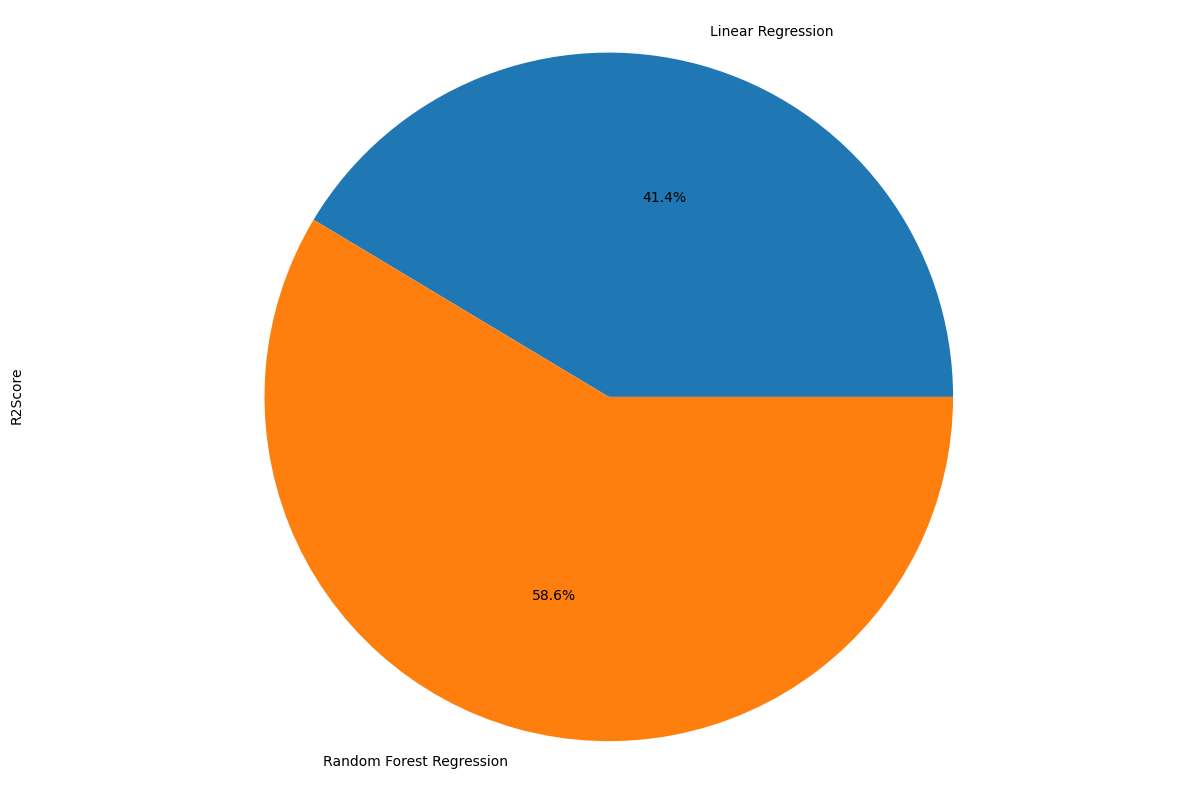

In [147]:
Result_DataFrame.set_index("Model", inplace=True)
Result_DataFrame['R2Score'].plot(kind='pie', figsize=(12, 8), autopct='%1.1f%%')

plt.axis('equal')
plt.tight_layout()
plt.show()

In [148]:
#Now Checking high correlation values by checking anamolies.
def crt(dataset, threshold):
    column_correlation = set()  # Set of all the names of correlated columns
    correlation_matrix = dataset.corr()
    for m in range(len(correlation_matrix.columns)):
        for n in range(m):
            if abs(correlation_matrix.iloc[m, n]) > threshold: # we are interested in absolute coeff value
                colname = correlation_matrix.columns[m]  # getting the name of column
                column_correlation.add(colname)
    return column_correlation

In [149]:
correlation_Features1 = crt(Redwinewithoutoutlier.drop("quality",axis=1), 0.6)
print(correlation_Features1)

{'pH', 'citric acid', 'total sulfur dioxide', 'density'}


In [150]:
print("Before Removing lower correlated value ",Redwinewithoutoutlier.columns)
for h in correlation_Features1:
    Redwinewithoutoutlier.drop(h, inplace=True, axis=1)

    
print("Before Removing lower correlated value",Redwinewithoutoutlier.columns)

Before Removing lower correlated value  Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Before Removing lower correlated value Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [151]:
#After Removing high correlated value from dataframe we will train again to check anamolies

FL_correlation=Redwinewithoutoutlier.drop("quality",axis=1)
X_train, X_test, y_train,y_test = train_test_split(FL_correlation,Labels,test_size=0.2,random_state=42)

In [152]:
X_train=Pipeline.fit_transform(X_train)
X_test =Pipeline.transform(X_test)
#Applying linear regression
Linear_Reg=LinearRegression()
Linear_Reg.fit(X_train,y_train)

LinearRegression()

In [153]:
predict=Linear_Reg.predict(X_test)
Train_predict=Linear_Reg.predict(X_train)

print("Test Data evaluation")


Evaluate_Model(y_test,predict)


print("Train Data evaluation")


Evaluate_Model(y_train,Train_predict)

resultLessFeatureDf=pd.DataFrame(data=[["Linear Regression",*Evaluate_Valuae(y_test,predict), validation(LinearRegression())]],
                     columns=["Model","MAE","Rootmse","R2Score","Cross Validation"])

Test Data evaluation
MAE: 0.523
RMSE: 0.657
R2 Square 0.375
Train Data evaluation
MAE: 0.489
RMSE: 0.615
R2 Square 0.352


In [154]:
#applying Random Forest
from sklearn.ensemble import RandomForestRegressor

RF_Forest= RandomForestRegressor(n_estimators=1000)
RF_Forest.fit(X_train, y_train)

Test_predict = RF_Forest.predict(X_test)
Train_predict = RF_Forest.predict(X_train)

print("Test set evaluation")

Evaluate_Model(y_test,Test_predict)

print("Train set evaluation")

Evaluate_Model(y_train,Train_predict)

DataFrame2=pd.DataFrame(data=[["Random Forest Regression",*Evaluate_Valuae(y_test,Test_predict), 0]],
                     columns=["Model","MAE","Rootmse","R2Score","Cross Validation"])
resultLessFeatureDf=resultLessFeatureDf.append(DataFrame2,ignore_index=True)

Test set evaluation
MAE: 0.416
RMSE: 0.566
R2 Square 0.538
Train set evaluation
MAE: 0.157
RMSE: 0.217
R2 Square 0.92


C:\Users\Admin\AppData\Local\Temp\ipykernel_25456\794619257.py:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



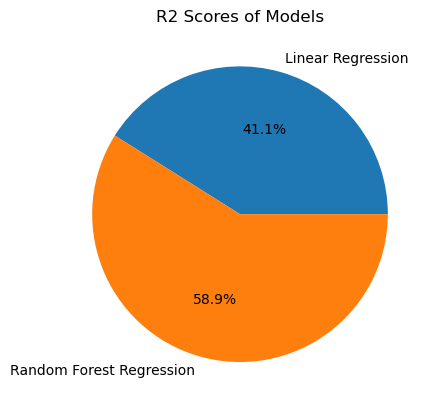

In [155]:
import matplotlib.pyplot as plt

resultLessFeatureDf.set_index("Model", inplace=True)
r2Scores = resultLessFeatureDf['R2Score']

fig, ax = plt.subplots()
ax.pie(r2Scores, labels=resultLessFeatureDf.index, autopct='%1.1f%%')
ax.set_title("R2 Scores of Models")

plt.show()

In [158]:
Here we can clearly see that Random Forest gives batter result as compare to Linear Regression

before removing 'pH', 'citric acid', 'total sulfur dioxide', 'density' 
R2 Score Linear Regression:41.4% R2 Score Random Forest: 58.6%
        
after removing
R2 Score Linear Regression:41.1% R2 Score Random Forest: 58.9%

SyntaxError: invalid syntax (1373622722.py, line 1)